In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

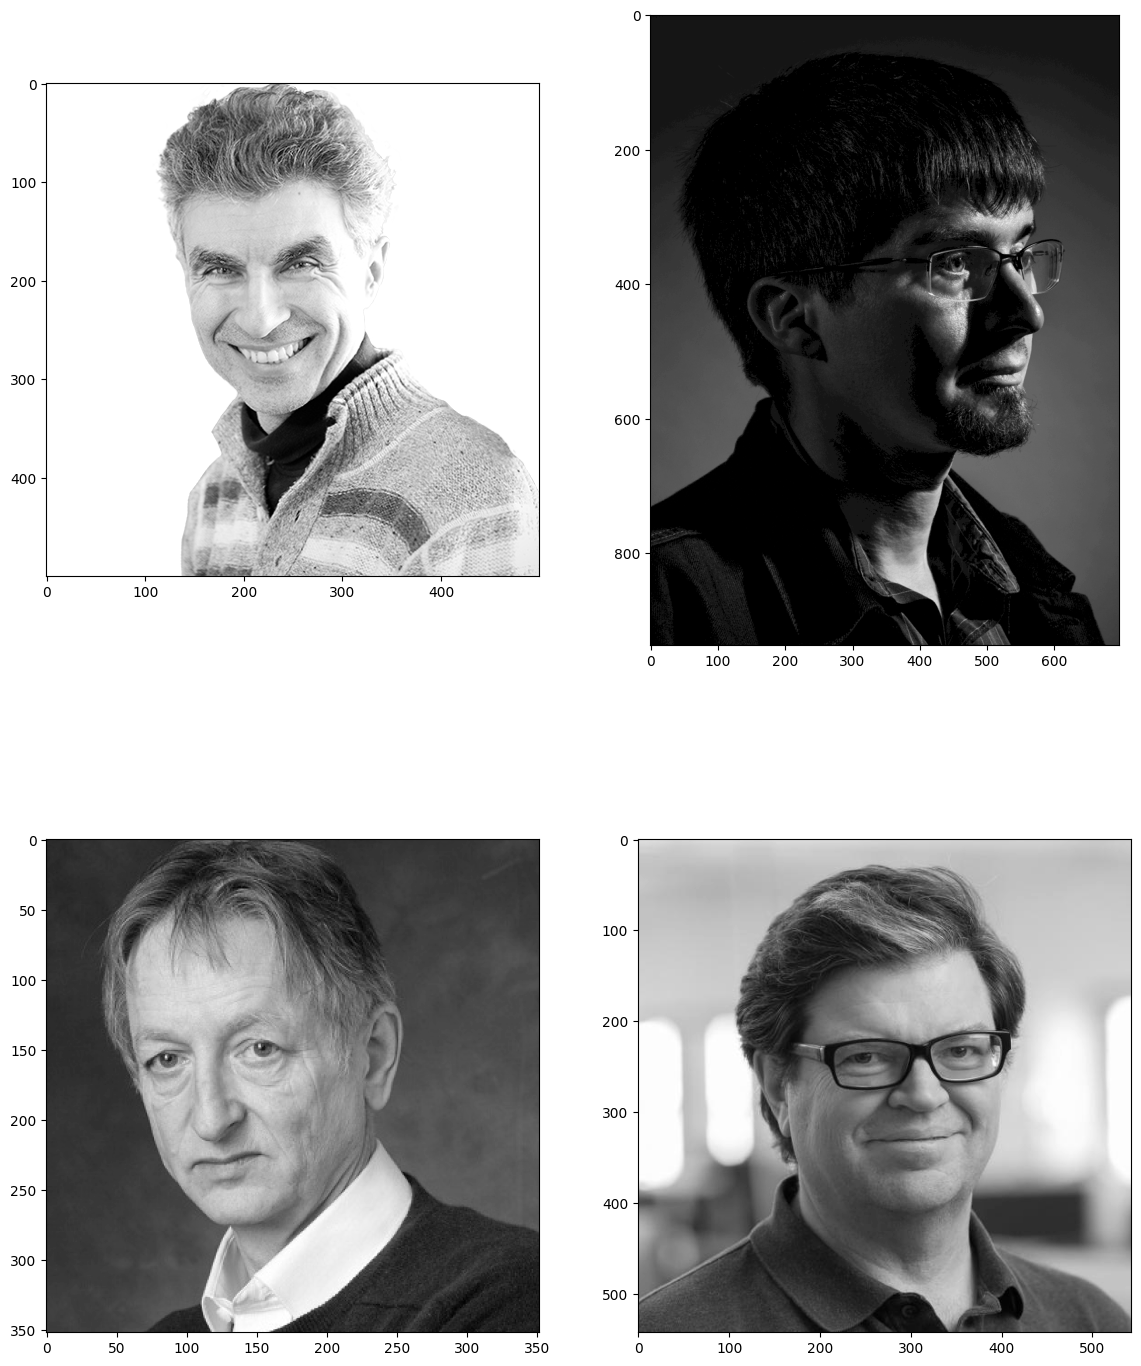

In [2]:
bengio = cv2.imread(r'C:\Users\hi\Desktop\project-files\images\bengio.jpg', 0)
goodfellow = cv2.imread(r'C:\Users\hi\Desktop\project-files\images\goodfellow.png', 0)
hinton = cv2.imread(r'C:\Users\hi\Desktop\project-files\images\hinton.jpg', 0)
lecun = cv2.imread(r'C:\Users\hi\Desktop\project-files\images\lecun.jpg', 0)

plt.figure(figsize=(14, 18))
plt.subplot(221)
plt.imshow(bengio, cmap='gray')
plt.subplot(222)
plt.imshow(goodfellow, cmap='gray')
plt.subplot(223)
plt.imshow(hinton, cmap='gray')
plt.subplot(224)
plt.imshow(lecun, cmap='gray')
plt.show()

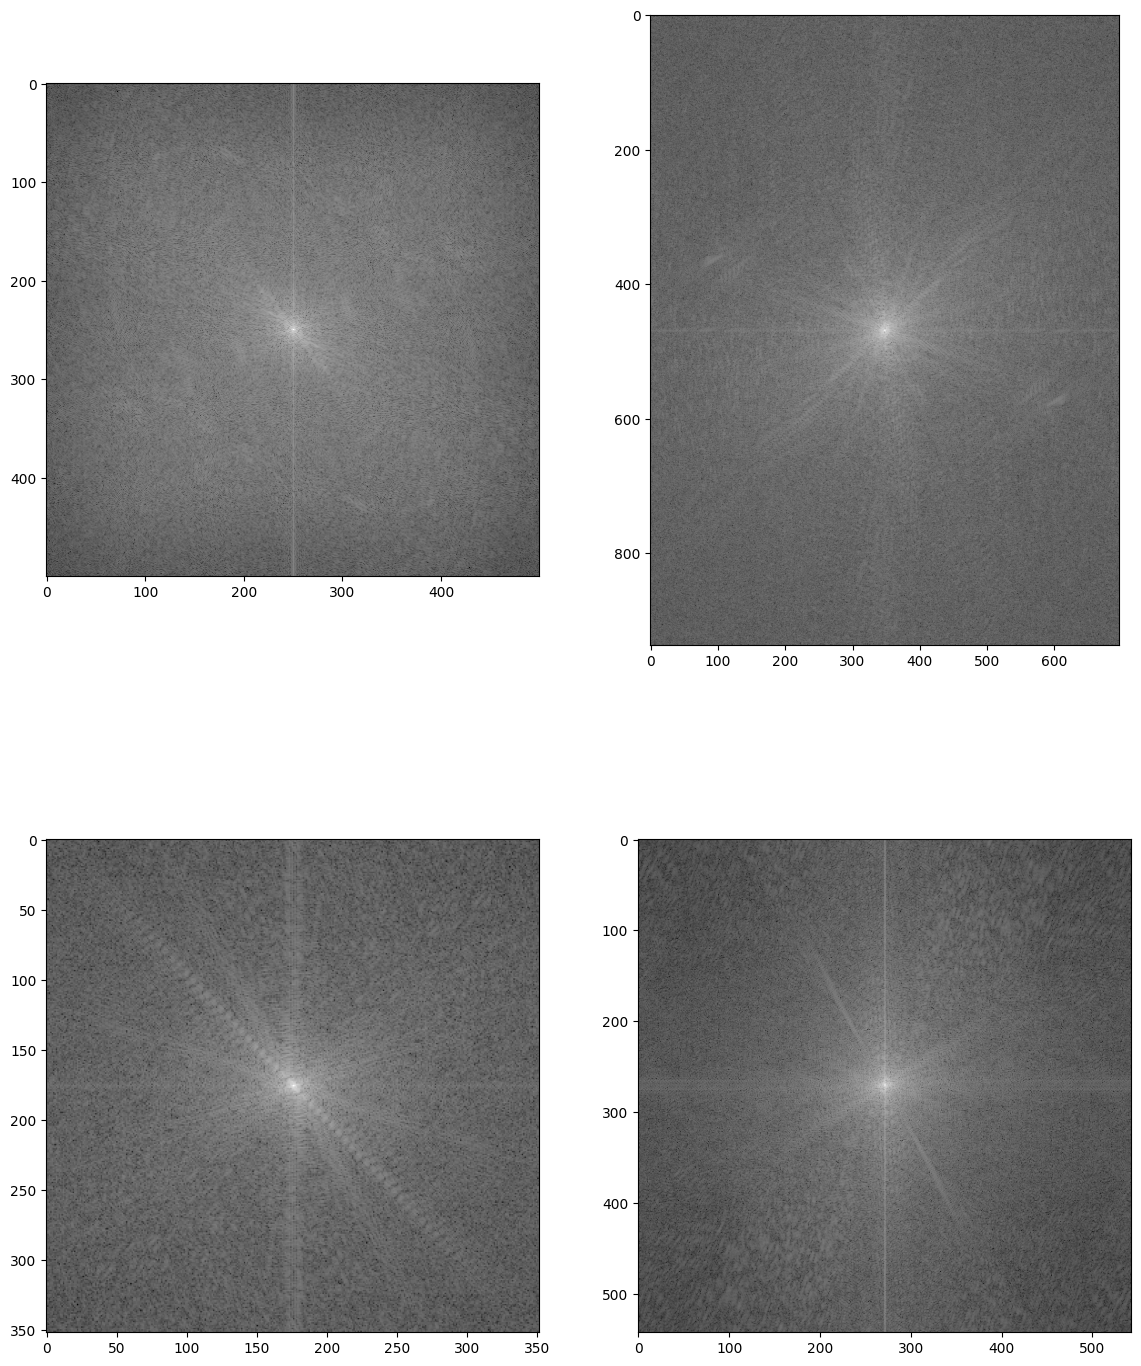

In [4]:
bengio_fft = np.fft.fftshift(np.fft.fft2(bengio))
goodfellow_fft = np.fft.fftshift(np.fft.fft2(goodfellow))
hinton_fft = np.fft.fftshift(np.fft.fft2(hinton))
lecun_fft = np.fft.fftshift(np.fft.fft2(lecun))

plt.figure(figsize=(14, 18))
plt.subplot(221)
plt.imshow(np.log(np.abs(bengio_fft)), cmap='gray')
plt.subplot(222)
plt.imshow(np.log(np.abs(goodfellow_fft)), cmap='gray')
plt.subplot(223)
plt.imshow(np.log(np.abs(hinton_fft)), cmap='gray')
plt.subplot(224)
plt.imshow(np.log(np.abs(lecun_fft)), cmap='gray')
plt.show()

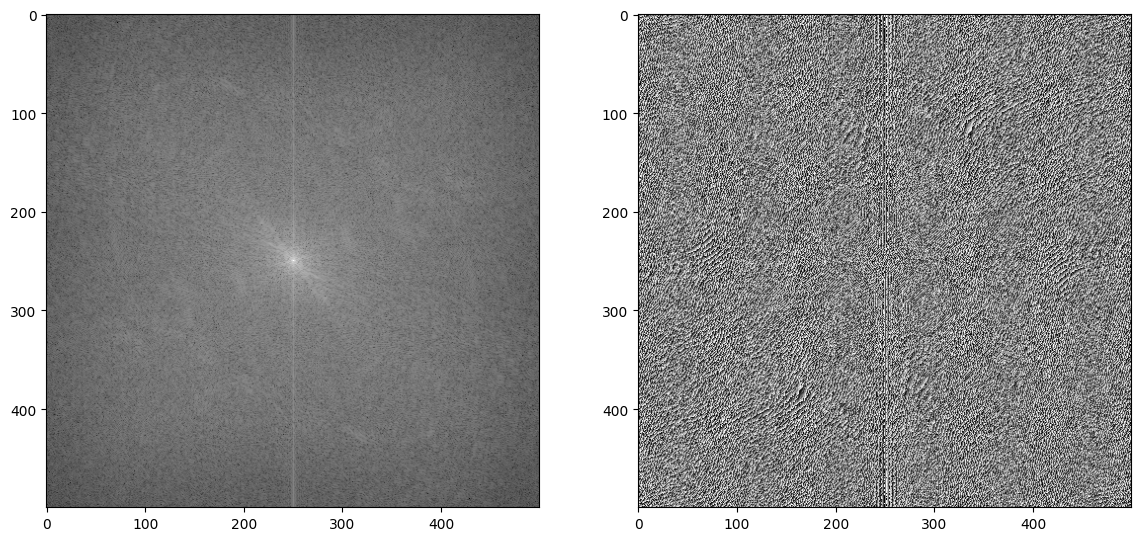

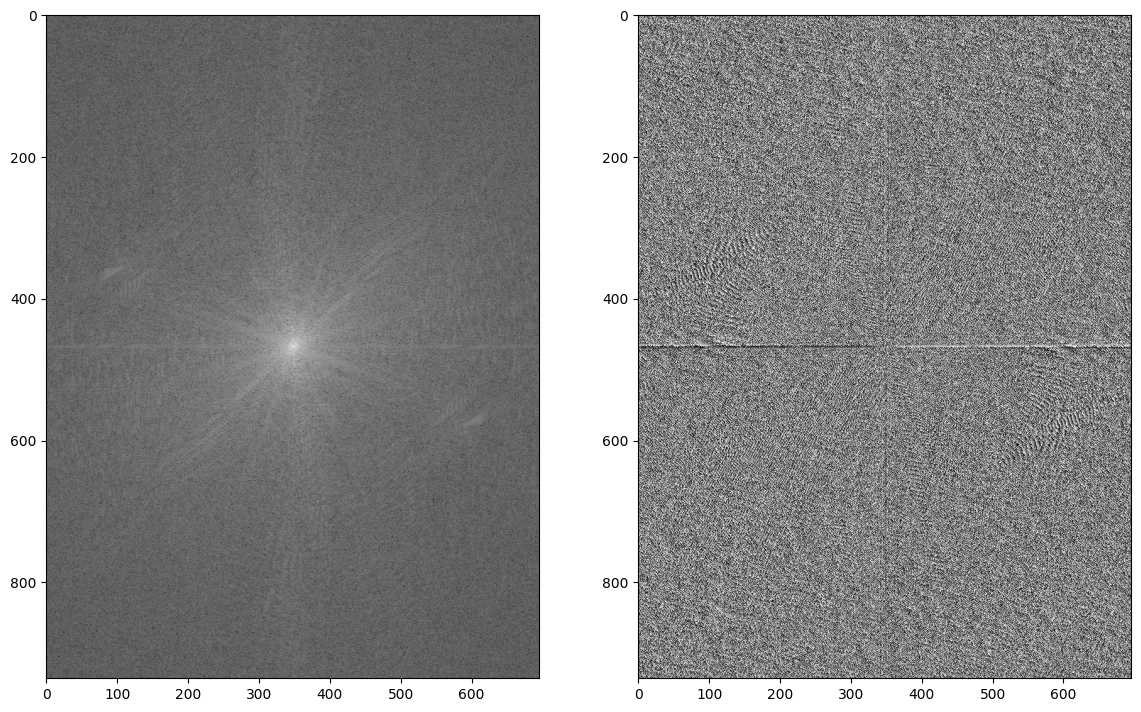

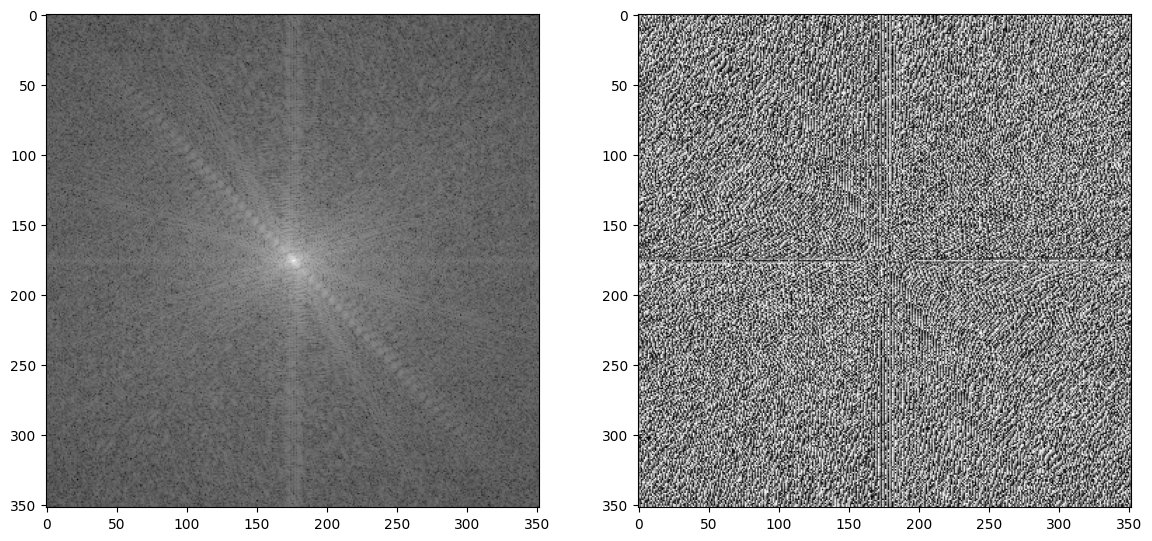

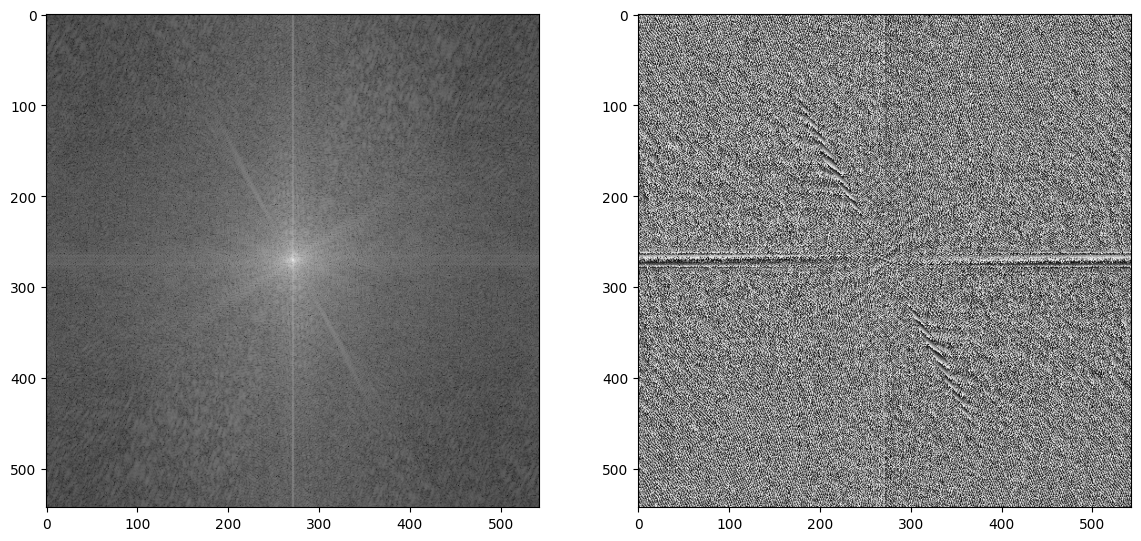

In [5]:
bengio_amplitude = np.sqrt(np.real(bengio_fft) ** 2 + np.imag(bengio_fft) ** 2)
bengio_phase = np.arctan2(np.imag(bengio_fft), np.real(bengio_fft))
goodfellow_amplitude = np.sqrt(np.real(goodfellow_fft) ** 2 + np.imag(goodfellow_fft) ** 2)
goodfellow_phase = np.arctan2(np.imag(goodfellow_fft), np.real(goodfellow_fft))
hinton_amplitude = np.sqrt(np.real(hinton_fft) ** 2 + np.imag(hinton_fft) ** 2)
hinton_phase = np.arctan2(np.imag(hinton_fft), np.real(hinton_fft))
lecun_amplitude = np.sqrt(np.real(lecun_fft) ** 2 + np.imag(lecun_fft) ** 2)
lecun_phase = np.arctan2(np.imag(lecun_fft), np.real(lecun_fft))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(bengio_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(bengio_phase, cmap='gray')

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(goodfellow_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(goodfellow_phase, cmap='gray')

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(hinton_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(hinton_phase, cmap='gray')

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(lecun_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(lecun_phase, cmap='gray')

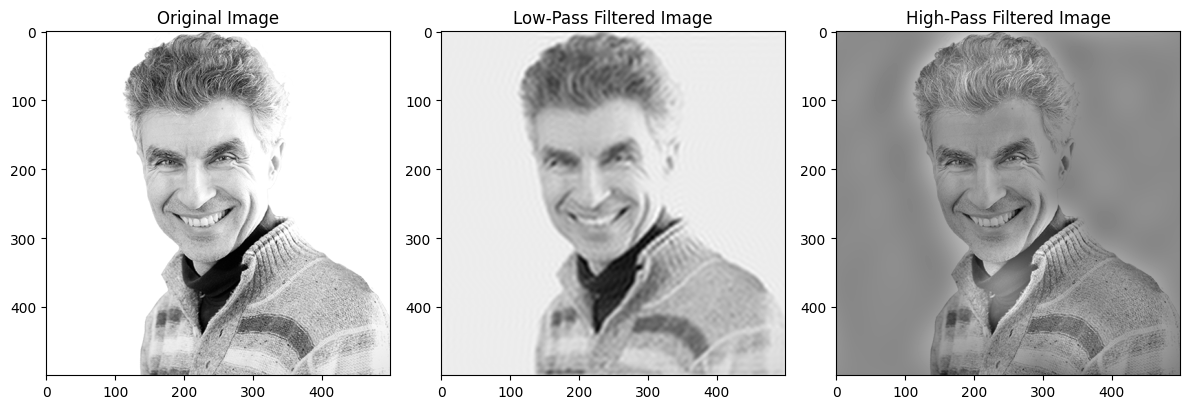

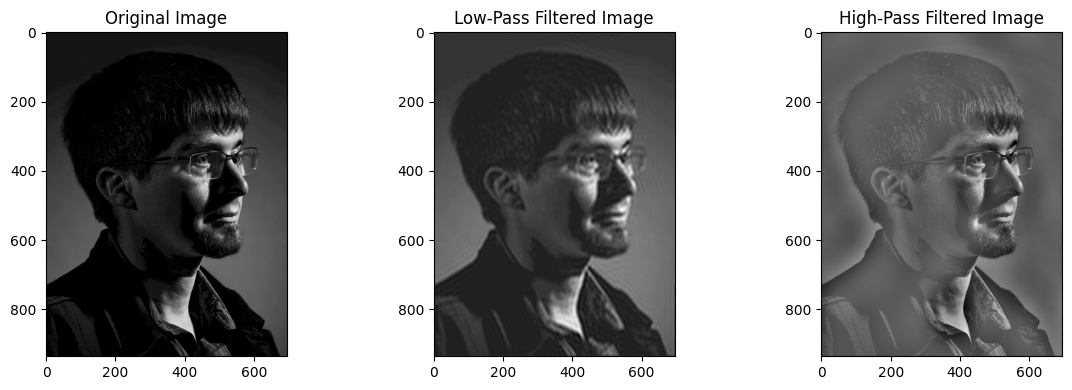

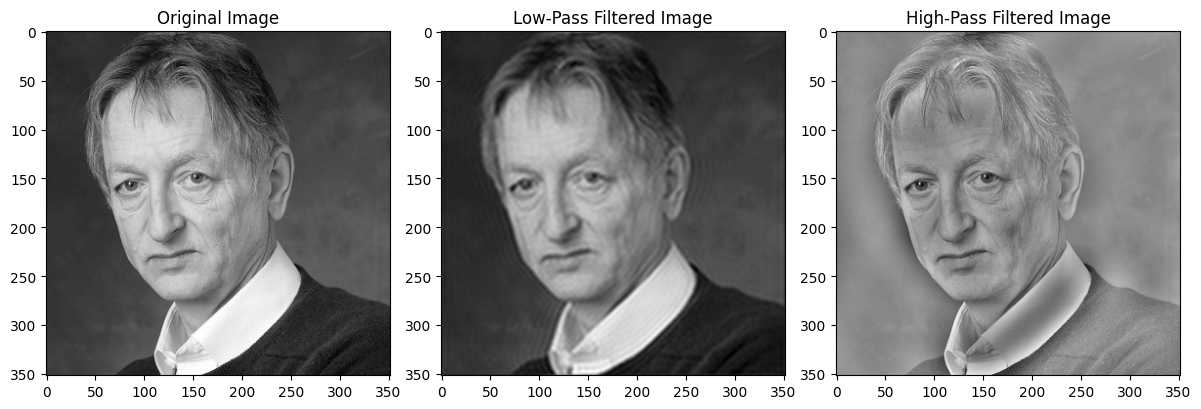

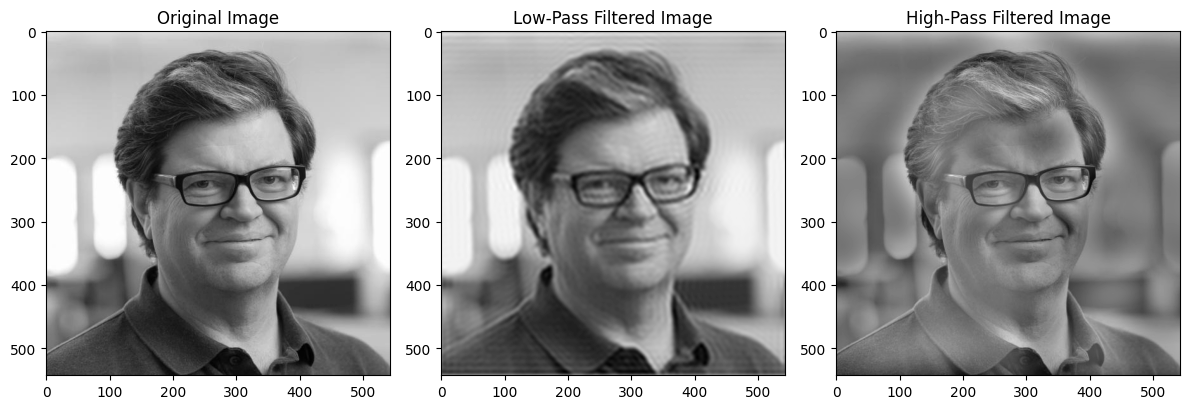

In [7]:
def low_pass_filter(image, cutoff_frequency):

    F = np.fft.fft2(image)

    F_shifted = np.fft.fftshift(F)

    height, width = image.shape

    mask = np.zeros((height, width), dtype=np.float64)
    cy, cx = height // 2, width // 2
    mask[cy - cutoff_frequency:cy + cutoff_frequency, cx - cutoff_frequency:cx + cutoff_frequency] = 1

    F_filtered_shifted = F_shifted * mask

    F_filtered = np.fft.ifftshift(F_filtered_shifted)

    filtered_image = np.fft.ifft2(F_filtered).real

    return filtered_image

def high_pass_filter(image, cutoff_frequency):

    F = np.fft.fft2(image)

    F_shifted = np.fft.fftshift(F)

    height, width = image.shape

    mask = np.ones((height, width), dtype=np.float64)
    cy, cx = height // 2, width // 2
    mask[cy - cutoff_frequency:cy + cutoff_frequency, cx - cutoff_frequency:cx + cutoff_frequency] = 0

    F_filtered_shifted = F_shifted * mask

    F_filtered = np.fft.ifftshift(F_filtered_shifted)

    filtered_image = np.fft.ifft2(F_filtered).real

    return filtered_image

low_pass_filtered_bengio = low_pass_filter(bengio, 50)
high_pass_filtered_bengio = high_pass_filter(bengio, 5)

low_pass_filtered_goodfellow = low_pass_filter(goodfellow, 50)
high_pass_filtered_goodfellow = high_pass_filter(goodfellow, 5)

low_pass_filtered_hinton = low_pass_filter(hinton, 50)
high_pass_filtered_hinton = high_pass_filter(hinton, 5)

low_pass_filtered_lecun = low_pass_filter(lecun, 50)
high_pass_filtered_lecun = high_pass_filter(lecun, 5)

fig_bengio, axs_bengio = plt.subplots(1, 3, figsize=(12, 4))
axs_bengio[0].imshow(bengio, cmap='gray')
axs_bengio[0].set_title('Original Image')
axs_bengio[1].imshow(low_pass_filtered_bengio, cmap='gray')
axs_bengio[1].set_title('Low-Pass Filtered Image')
axs_bengio[2].imshow(high_pass_filtered_bengio, cmap='gray')
axs_bengio[2].set_title('High-Pass Filtered Image')
plt.tight_layout()

fig_goodfellow, axs_goodfellow = plt.subplots(1, 3, figsize=(12, 4))
axs_goodfellow[0].imshow(goodfellow, cmap='gray')
axs_goodfellow[0].set_title('Original Image')
axs_goodfellow[1].imshow(low_pass_filtered_goodfellow, cmap='gray')
axs_goodfellow[1].set_title('Low-Pass Filtered Image')
axs_goodfellow[2].imshow(high_pass_filtered_goodfellow, cmap='gray')
axs_goodfellow[2].set_title('High-Pass Filtered Image')
plt.tight_layout()

fig_hinton, axs_hinton = plt.subplots(1, 3, figsize=(12, 4))
axs_hinton[0].imshow(hinton, cmap='gray')
axs_hinton[0].set_title('Original Image')
axs_hinton[1].imshow(low_pass_filtered_hinton, cmap='gray')
axs_hinton[1].set_title('Low-Pass Filtered Image')
axs_hinton[2].imshow(high_pass_filtered_hinton, cmap='gray')
axs_hinton[2].set_title('High-Pass Filtered Image')
plt.tight_layout()

fig_lecun, axs_lecun = plt.subplots(1, 3, figsize=(12, 4))
axs_lecun[0].imshow(lecun, cmap='gray')
axs_lecun[0].set_title('Original Image')
axs_lecun[1].imshow(low_pass_filtered_lecun, cmap='gray')
axs_lecun[1].set_title('Low-Pass Filtered Image')
axs_lecun[2].imshow(high_pass_filtered_lecun, cmap='gray')
axs_lecun[2].set_title('High-Pass Filtered Image')
plt.tight_layout()

plt.show()